# Smart Meter Data provided by EWE AG

Hi all,
we are happy to join BCX as hack coaches!

We provided you a data extract from our research project "enera". In this notebook we give you a short overview over our provided data.

### What is it all about?
Disaggregation of electric meter data enables promising use cases: energy transparency, appliance load monitoring, predictive maintenance, and behavior analytics. Because many smart meters will be available soon, no further hardware is required. The hackers can use our real-world data for developing prototypes and bring these use cases to action. We will provide household load profiles from a large research project with 1 second resolution and appliance labels. Furthermore, we will provide three-phase meter data.
The data was gathered in September and October 2019.

### How to use the data?

Simple script which you can copy if you like.

In [12]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#your data path
data_path = os.path.join('YOUR_PATH')
   
# this method unzips the csv file and loads it to a pandas dataframe
# supply exisiting meter, month_str ('09' or '10'), obis (i.e. 'Power')
def read_meter_data(meter,month_str,obis):
    data_ranges = dict()
    data_ranges['09'] = '2019-09-01_2019-10-01'
    data_ranges['10'] = '2019-10-01_2019-11-01'
    zip_path = os.path.join(data_path,'bcx','{}'.format(month_str),meter,obis)
    zip_name = "meas{}__{}_{}.zip".format(meter,obis,data_ranges[month_str])
    csv_name = zip_name[:-3] + 'csv'
    
    if not os.path.exists(os.path.join(zip_path,csv_name)):
        with zipfile.ZipFile(os.path.join(zip_path,zip_name), 'r') as zip_ref:
            zip_ref.extractall(zip_path)
    df = pd.read_csv(os.path.join(zip_path,csv_name))
    df.index = pd.to_datetime(df.TD_TIMECODE)
    if len(df.index) > 0:
        df.index = df.index.tz_convert('Europe/Berlin')
    return df.Reading_Meas

# this method loads the measurement from the main household meter and its attached sub-meters for washing, drying and dishwascher
def load_data(meter_id,meter_df,month_str,obis):
    print(meter_id)
    dfs = dict()
    dfs['meter'] = read_meter_data(str(meter_id),month_str,obis)
    id = meter_df[meter_df.Meter_ID==meter_id].ID.values[0]
    for sub_meter in meter_df[meter_df.ParentDeviceID==id].Meter_ID:
        name = meter_df[meter_df.Meter_ID==sub_meter].Name.values[0]
        sub_meter_id = meter_df[meter_df.Meter_ID==sub_meter].Meter_ID.values[0]
        print(name)
        dfs[name] = read_meter_data(str(sub_meter_id),month_str,obis)
    return dfs



In [13]:
# loads all the meter and sub-meter ids
meter_df = pd.read_csv(os.path.join(data_path,'bcx', 'meter_ids.csv'))

In [14]:
# loads all parent meter ids (main household meter)
parent_ids = meter_df[meter_df.ParentDeviceID=='00000000-0000-0000-0000-000000000000'].Meter_ID
parent_ids

0     100037
3     100033
7     100045
11    200035
15    100017
19    100038
23    100020
Name: Meter_ID, dtype: int64

In [15]:
# load a single meter and its sub-meter for month september 
dfs = load_data(200035,meter_df,'09','Power')

200035
Geschirr
Waschmaschine
Trockner


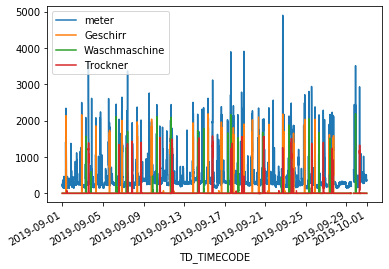

In [16]:
for key in dfs:
    sub = dfs[key].resample('10Min').mean()
    sub = sub.rename(key)
    sub.plot(legend=True)

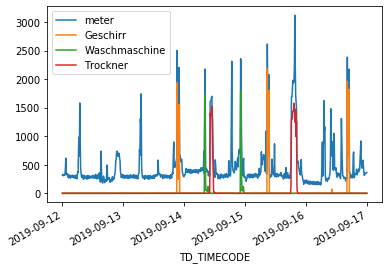

In [17]:
for key in dfs:
    sub = dfs[key]['2019-09-12':'2019-09-16'].resample('10Min').mean()
    sub = sub.rename(key)
    sub.plot(legend=True)

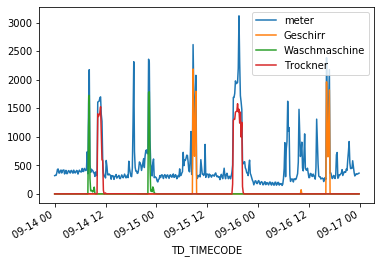

In [18]:
for key in dfs:
    sub = dfs[key]['2019-09-14':'2019-09-16'].resample('10Min').mean()
    sub = sub.rename(key)
    sub.plot(legend=True)